## ridge regression lasso regression elastic net##

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston=load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
# creating dataset
import pandas as pd
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)


In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df["land rate"]=boston.target

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,land rate
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
x=boston_df.drop("land rate", axis=1).values
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
y=boston_df["land rate"]
y.values

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
# Ridge Regression =sum of arror+sum of sqres of magnitude of 
# coefficient(alpha)
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1,solver='svd')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=2,random_state=2)

In [13]:
rr.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='svd', tol=0.001)

In [14]:
y_predict=rr.predict(x_train)

In [15]:
y_predict

array([34.35009431, 30.76337277,  3.29767624,  3.71933712, 26.9223964 ,
       22.65967317, 14.7102706 , 22.36778202, 30.85637072, 26.71575472,
       21.01026888, 18.71896928, 17.59828317, 24.79807466, 23.23544641,
       13.50953943,  9.31390501, 18.68349359, 22.29613841, 20.14867759,
       36.24527686, 20.62139922, 19.93068741, 16.66073719, 36.55062748,
       34.35724307, 31.46685029, 23.40743005, 18.18079197, 21.3205432 ,
       32.02618985, 30.21904777, 13.15332948, 17.21950464, 13.49745282,
       23.61584234, 25.64826737, 22.74182734, 28.54213216, 12.5166313 ,
       30.80829847,  6.1833966 , 22.87115073, 20.42409577, 32.85844757,
       19.24115132, 35.38748812,  0.75890713, 31.26323427, 31.60076491,
        6.55167561, 34.14034267, 19.87765797, 19.74792091, 19.75512895,
       18.64575628, 15.83367187, 22.49438895, 18.87701073, 17.42832151,
       18.45225152, 32.5156734 , 35.02466253, 24.52073448, 41.74541425,
       31.87484852, 14.34332069, 27.09814418,  8.75679352,  5.67

## score ##

In [16]:
rr.score(x_train,y_train)

0.7393555153582303

In [17]:
rr.score(x_test,y_test)

-3.126811469971634

In [18]:
rr.coef_

array([-1.04529298e-01,  4.75326176e-02, -7.87606017e-03,  2.70774996e+00,
       -1.02546960e+01,  3.78874274e+00, -5.38996739e-03, -1.36527515e+00,
        2.88454753e-01, -1.28601514e-02, -8.83885975e-01,  9.67918076e-03,
       -5.40556143e-01])

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lrtrain_score=lr.score(x_train,y_train)
print("LR train score",lrtrain_score)


LR train score 0.7410023924536164


In [23]:
lrtest_score=lr.score(x_test,y_test)
print("LR Test score",lrtest_score)


LR Test score -1.7228267458212243


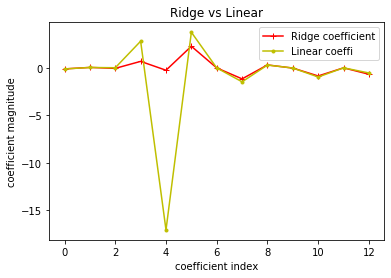

In [29]:
import matplotlib.pyplot as plt
plt.plot(rr.coef_,marker="+",label="Ridge coefficient",color="r")
plt.plot(lr.coef_,marker=".",label="Linear coeffi",color="y")
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.title("Ridge vs Linear")
plt.legend()
plt.show()

In [30]:
rr.coef_

array([-1.02730383e-01,  5.43956196e-02, -4.67826331e-02,  6.89998294e-01,
       -2.44009461e-01,  2.28184691e+00,  1.78778369e-03, -1.15299306e+00,
        3.15123454e-01, -1.57898713e-02, -8.47344704e-01,  9.41278199e-03,
       -6.67742650e-01])

In [31]:
rr=Ridge(alpha=100,solver="cholesky")

In [32]:
rr.fit(x_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [28]:
plt.plot(rr.coef_'go')
plt.plot(lr.coef_,'r')

SyntaxError: invalid syntax (<ipython-input-28-0d2494483c13>, line 1)

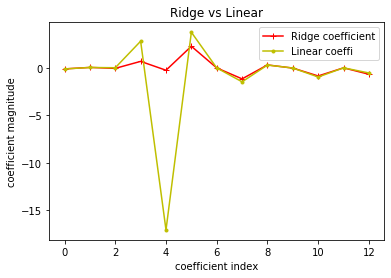

In [33]:
import matplotlib.pyplot as plt
plt.plot(rr.coef_,marker="+",label="Ridge coefficient",color="r")
plt.plot(lr.coef_,marker=".",label="Linear coeffi",color="y")
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.title("Ridge vs Linear")
plt.legend()
plt.show()

## lasso Regression


##sum of error +sum of absolute values of coefficient

In [37]:
from sklearn.linear_model import Lasso

In [39]:
l=Lasso(alpha=1)

In [ ]:
import numpy as np
new_x=np.random.rand(100,1)
new_y=np.05"new_x+2+np.random

In [40]:
fit(new_x,new_y)

NameError: name 'fit' is not defined

In [41]:
new_x

NameError: name 'new_x' is not defined

In [42]:
new_y

NameError: name 'new_y' is not defined

In [43]:
predict([[0.98]])

NameError: name 'predict' is not defined

In [44]:
from sklearn.model_selection import train_test_split
new_x_train,new_x_test,new_y_train,new_y_test=train_test_size=0.2,random_state=1

SyntaxError: can't assign to literal (<ipython-input-44-bad9e3e08007>, line 2)

In [45]:
fit(new_x_train,new_y_train)

NameError: name 'fit' is not defined

In [46]:
l.score(new_x_test,new_y_test)

NameError: name 'new_x_test' is not defined

In [47]:
coef_

NameError: name 'coef_' is not defined

In [48]:
plt.plot(l.coef)

AttributeError: 'Lasso' object has no attribute 'coef'

In [ ]:
plt.plot(l.coef_,'x',label="Lasso Regression")
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.title("Ridge vs Linear")
plt.legend()
plt.show()

In [49]:
l.coef_

AttributeError: 'Lasso' object has no attribute 'coef_'

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet

In [66]:
e=ElasticNet

In [69]:
p=6*np.random.rand(50,2)
q=8*p**2+np.random.rand(50,2)
p.shape

(50, 2)

In [70]:
p[1]

array([2.8112991, 3.2127391])